# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

This notebook use transfer learning to build a traffic sign recognition classifer using GoogLeNet as base network.

## Step 0: Load The Data
<a href="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip" target="_blank">Link to download data set</a>

In [1]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np

# Number of training examples
n_train = len(y_train)

# Number of testing examples.
n_test = len(y_test)

# The shape of an traffic sign image?
image_shape = X_train[0].shape

# Number of unique classes/labels in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


34


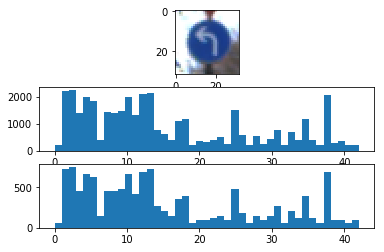

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# plot a random training image
plt.subplot(3,1,1)
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.imshow(image, cmap="gray")
print(y_train[index])

# plot label distribution of training examples
plt.subplot(3,1,2)
n, bins, patches = plt.hist(y_train, 43)

# plot label distribution of test examples
plt.subplot(3,1,3)
n, bins, patches = plt.hist(y_test, 43)

## Step 2: Data Augmentation 
1. even distribute the training data set
2. randomly warped and add shadow to traning data
3. build keras data generator

In [ ]:
# data augmentation helper functinos
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# random shift
def random_shift(image,angle,trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = 40*np.random.uniform()-40/2
    angle = angle + tr_x/trans_range*2*0.2
    rows, cols, chan = image.shape
    M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image = cv2.warpAffine(image, M, (cols,rows))
    return image, angle

# random brightness
def random_brightness(image):
    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = 0.2+np.random.uniform() # range from 0.2 to 1.2 of original image brightness
    image[:,:,2] = image[:,:,2]*random_bright
    image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
    return image

# random shadow
def random_shadow(image):
    top_y = 320*np.random.uniform()
    top_x = 0
    bot_x = 160
    bot_y = 320*np.random.uniform()
    image_hls = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    shadow_mask = 0*image_hls[:,:,1]
    X_m = np.mgrid[0:image.shape[0],0:image.shape[1]][0]
    Y_m = np.mgrid[0:image.shape[0],0:image.shape[1]][1]
    shadow_mask[((X_m-top_x)*(bot_y-top_y) -(bot_x - top_x)*(Y_m-top_y) >=0)]=1
    #random_bright = .25+.7*np.random.uniform()
    if np.random.randint(2)==1:
        random_bright = 0.5
        cond1 = shadow_mask==1
        cond0 = shadow_mask==0
        if np.random.randint(2)==1:
            image_hls[:,:,1][cond1] = image_hls[:,:,1][cond1]*random_bright
        else:
            image_hls[:,:,1][cond0] = image_hls[:,:,1][cond0]*random_bright    
    image = cv2.cvtColor(image_hls,cv2.COLOR_HLS2RGB)
    return image

# random flip
def random_flip(image, angle):
    flip = np.random.randint(2)
    if flip:
        image = cv2.flip(image,1)
        angle = -angle
    return image, angle

# img_reader
def img_reader(record_id):
    cam_pos = np.random.randint(3)
    image_path = log[record_id][cam_pos]
    # left camera shift angle 0.27, right camera shift angle -0.27
    if (cam_pos == 0):# center cam
        shift_ang = 0
    if (cam_pos == 1): # left cam
        shift_ang = 0.27
    if (cam_pos == 2): # right cam
        shift_ang = -0.27
    angle = file_path = log[record_id][3] + shift_ang
    image = mpimg.imread(image_path)
    
    # augmentation pipeline
    image = random_shadow(image)
    image, angle = random_shift(image, angle, 100)
    image = random_brightness(image)
    image, angle = random_flip(image, angle)
    return image, angle


# test case
record_id = np.random.randint(len(log))
path = log[record_id][0]
print(log[record_id][3])
image = mpimg.imread(path)
plt.figure(0)
plt.imshow(image)
image, angle = img_reader(record_id)
image = image[50:-25,:,:]
print(image.shape)
plt.figure(1)
plt.imshow(image)
print(angle)
plt.figure(2)
plt.imshow(image[:,:,0], cmap="gray")
plt.figure(3)
plt.imshow(image[:,:,1], cmap="gray")
plt.figure(4)
plt.imshow(image[:,:,2], cmap="gray")